### Binomial and Beta distribution

The Beta distribution is a probability distribution on probabilities. We can use it to model the probabilities (beceause of this it is bounded from 0 to 1). But in order to understand it we must first understand the Binomial distribution.

The function of Beta distribution is

$$
\frac{x^{(a-1)}*(1-x)^{b-1}}{B(a,b)}
$$

where B(a,b) is:
$$
\frac{Г(а)Г(b)}{Г(a+b)}
$$
and Г is the gamma distribution.

But let's try to understand this on easier way through the Binomial distribution.
We remember that Binomial distribution models the series of Bernouli events.
Bernoulli's distribution represents the probability that an event will occur.
The mean value of the Bernoulli (p) variable is p, and its standard deviation is sqrt (p (1 - p)).

In [1]:
from random import random
def bernoulli_trial(p):
    if random() < p:
        return 1
    else: 
        return 0

In [2]:
import numpy as np

coin_toss = []
for i in range(1,101):
    coin_toss.append(bernoulli_trial(0.5))
print('mean of fair coin based on 100 throws:', round(sum(coin_toss)/len(coin_toss),3))
print('standard deviation of 100 throws of fair coin:', round(np.std(coin_toss),3))

mean of fair coin based on 100 throws: 0.47
standard deviation of 100 throws of fair coin: 0.499


As the number of throws increase, according to the law of large numbers, the mean and st. deviation will go through the theoretical input (in this case - 0.5)

In [3]:
def bernouli_events(num_of_event, probability, printing = True):
    coin_toss = []
    for i in range(1,num_of_event):
        coin_toss.append(bernoulli_trial(probability))
    if printing:
        print('mean of fair coin based on 100 throws:', sum(coin_toss)/len(coin_toss))
        print('standard deviation of 100 throws of fair coin:', round(np.std(coin_toss),3))
    return sum(coin_toss)/len(coin_toss), round(np.std(coin_toss),3)

In [4]:
# we create the variable with the series of number of events of different lenghts to illustrate the large of high numbers
# and divergence to the theoretical value
num_of_events = np.arange(2,10001, 10)

In [5]:
outcomes_of_events = []
for event_lenght in num_of_events:
    mean_of_event, _ = bernouli_events(event_lenght, 0.5, printing=False)
    outcomes_of_events.append(mean_of_event)

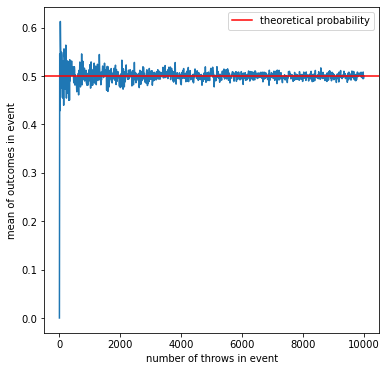

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(num_of_events, outcomes_of_events);
plt.xlabel('number of throws in event')
plt.ylabel('mean of outcomes in event')
plt.axhline(y=0.5, color='r', linestyle='-', label = 'theoretical probability')
plt.legend();

As the lenght of the number of throws in event grows, as well as step size is in increased in our simulation, results should converge to the theoretical red line much faster.

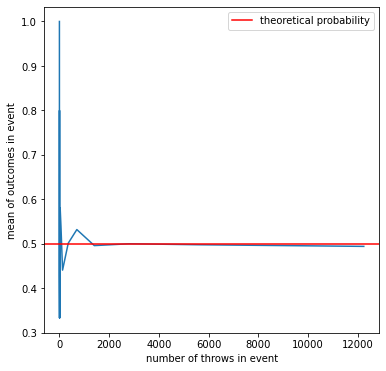

In [7]:
num_of_events = [2,4,6,8,16,32,64,128,356,702,1404,2808,5616,12232]
outcomes_of_events = []
for event_lenght in num_of_events:
    mean_of_event, _ = bernouli_events(event_lenght, 0.5, printing=False)
    outcomes_of_events.append(mean_of_event)
plt.figure(figsize=(6,6))
plt.plot(num_of_events, outcomes_of_events);
plt.xlabel('number of throws in event')
plt.ylabel('mean of outcomes in event')
plt.axhline(y=0.5, color='r', linestyle='-', label = 'theoretical probability')
plt.legend();

 
Binomial distribution is a discrete distribution (the outcome can only be an integer, i.e. an event)
The basic assumption of the binomial distribution is that there is a finite number of n independent experiments in which
possible result "success" or "failure". The probability of "success" is p and is the same for all experiments,
while the probability of "failure" is 1-p. That a series of numbers is subject to binomial distribution can be abbreviated as

#### X ~ B (n, p)

where is

###### X - random variable,
###### B - designation for binomial distribution,
###### n - number of experiments
###### p - probability of success.

Binomial function does something similar as our piece of code for illustration of law of large number, but it sums the elements wanting to give an answer how many attempts is needed to achieve some desired outcome.

In [8]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [9]:
# here we ask one question ten times: how meny throws we need to acquire the 50 heads.
for i in range(1,10):
    print(binomial(100, 0.5))
    

55
48
49
49
41
44
59
53
52


The central boundary theorem says that as n becomes very large, the binomial (n, p) variable is approximately
normal random variable with arithmetic mean m = np and standard deviation
s = sqrt (np (1 - p)). Now we will show that with enlarging the number of questions, the answer will create normal distribution with a mean around 50. So, it should produce normal (gaussian) distribution with a mean around 50 trials.

In [10]:
binomial_outcome = []
for i in range(1,10000):
    binomial_outcome.append(binomial(100, 0.5))

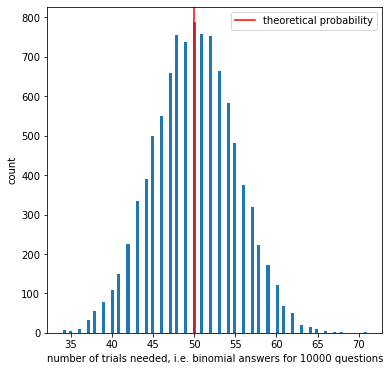

In [11]:
plt.figure(figsize=(6,6))
plt.hist(binomial_outcome, bins = 100);
plt.xlabel('number of trials needed, i.e. binomial answers for 10000 questions')
plt.ylabel('count')
plt.axvline(x=50, color='r', linestyle='-', label = 'theoretical probability')
plt.legend();

Now, with Beta distribution we ask question, instead about the number of successes, about the probability (p) of success, i.e. we model the random variable X that describes the probability (p) of success if we now the number of successes (a-1) and number of failures (b-1), of course that goes from 0 to 1, becease it is a probability. It can model different distributions for successes and failures (conjugate prior) and we can update it as we get more cases which are successes or failures. As a and b changes, so it will change our beta distribution. Let's take a look for a case of supposed fair coin but which gave some odd outcomes (y1 = we got 20 heads and 80 toss, y3 = vice versa and y2 gave us expected outcome of a fair coin).

In [12]:
from scipy.stats import beta
x = np.linspace(0,1,10000)
y1 = beta.pdf(x, 20,80) #a is 20, b is 80
y2 = beta.pdf(x, 50,50)
y3 = beta.pdf(x, 80,20)

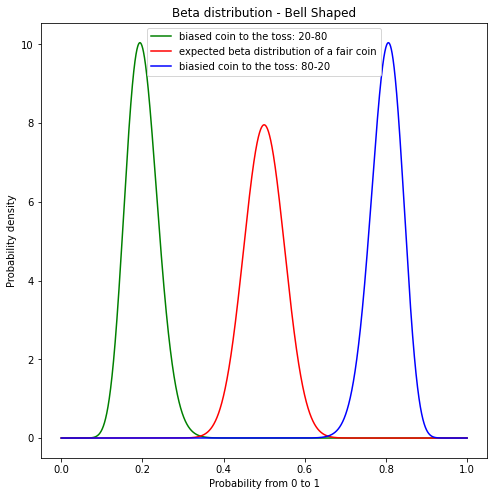

In [13]:
plt.figure(figsize=(8,8))
plt.title('Beta distribution - Bell Shaped')
plt.xlabel('Probability from 0 to 1')
plt.ylabel('Probability density')
plt.plot(x, y1, color = 'green', label = 'biased coin to the toss: 20-80')
plt.plot(x, y2, color = 'red', label = 'expected beta distribution of a fair coin')
plt.plot(x, y3, color = 'blue', label = 'biasied coin to the toss: 80-20')
plt.legend();

With a smaller number of throws, we will not get such a good bell shaped curves.

In [14]:
import scipy
from scipy.stats import beta
def beta_function(alpha, beta):
    
    x = np.linspace(0,1,100)
    yUU = scipy.stats.beta.pdf(x,alpha,beta)
#     y2 = beta.pdf(x, 5,5)
#     y3 = beta.pdf(x, 8,2)
    
    plt.title('Beta distribution - Bell Shaped')
    plt.xlabel('Probability from 0 to 1')
    plt.ylabel('Probability density')
    plt.plot(x, yUU, label = f'alpha: {alpha}, beta: {beta}')
#     plt.plot(x, y2, color = 'red', label = 'expected beta distribution of a fair coin')
#     plt.plot(x, y3, color = 'blue', label = 'biasied coin to the toss: 8-2')
#     plt.legend()
    
    return yUU

In [15]:
y1 = beta.pdf(x,5,5)

In [16]:
y1.shape

(10000,)

In [17]:
alpha = np.arange(1,50, 5).tolist()
bis = np.arange(1,50,5).tolist()

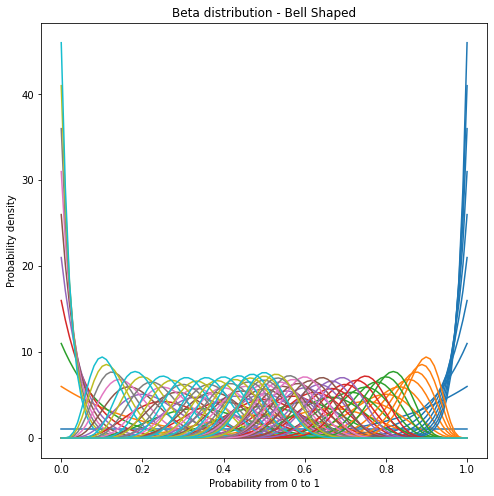

In [18]:
plt.figure(figsize=(8,8))
for a in alpha:
    for b in bis:
        u = beta_function(a,b)

array([0.00000000e+00, 9.22932063e-13, 4.30874331e-10, 1.50892427e-08,
       1.82888931e-07, 1.23884158e-06, 5.80554296e-06, 2.10915190e-05,
       6.35795525e-05, 1.66149953e-04, 3.87833315e-04, 8.26063187e-04,
       1.63094585e-03, 3.02072566e-03, 5.29733826e-03, 8.86073930e-03,
       1.42205937e-02, 2.20039179e-02, 3.29573868e-02, 4.79432360e-02,
       6.79280012e-02, 9.39637043e-02, 1.27161519e-01, 1.68658373e-01,
       2.19577380e-01, 2.80983364e-01, 3.53835111e-01, 4.38936198e-01,
       5.36886487e-01, 6.48036390e-01, 7.72446059e-01, 9.09851492e-01,
       1.05963936e+00, 1.22083208e+00, 1.39208424e+00, 1.57169119e+00,
       1.75760996e+00, 1.94749241e+00, 2.13872988e+00, 2.32850819e+00,
       2.51387153e+00, 2.69179328e+00, 2.85925156e+00, 3.01330711e+00,
       3.15118098e+00, 3.27032952e+00, 3.36851406e+00, 3.44386300e+00,
       3.49492430e+00, 3.52070642e+00, 3.52070642e+00, 3.49492430e+00,
       3.44386300e+00, 3.36851406e+00, 3.27032952e+00, 3.15118098e+00,
      

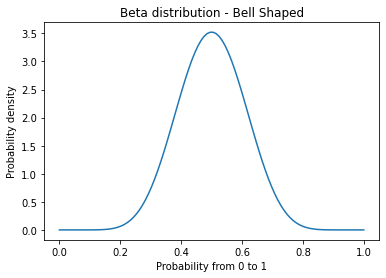

In [19]:
beta_function(10, 10)

1 1
1 6
1 11
1 16
1 21
1 26
1 31
1 36
1 41
1 46
6 1
6 6
6 11
6 16
6 21
6 26
6 31
6 36
6 41
6 46
11 1
11 6
11 11
11 16
11 21
11 26
11 31
11 36
11 41
11 46
16 1
16 6
16 11
16 16
16 21
16 26
16 31
16 36
16 41
16 46
21 1
21 6
21 11
21 16
21 21
21 26
21 31
21 36
21 41
21 46
26 1
26 6
26 11
26 16
26 21
26 26
26 31
26 36
26 41
26 46
31 1
31 6
31 11
31 16
31 21
31 26
31 31
31 36
31 41
31 46
36 1
36 6
36 11
36 16
36 21
36 26
36 31
36 36
36 41
36 46
41 1
41 6
41 11
41 16
41 21
41 26
41 31
41 36
41 41
41 46
46 1
46 6
46 11
46 16
46 21
46 26
46 31
46 36
46 41
46 46


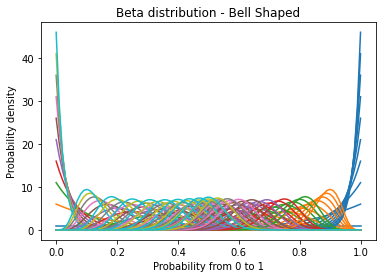

In [20]:
from scipy.stats import beta
alpha = np.arange(1,50, 5).tolist()
for a in alpha:
    for b in bis:
        print(a,b)
        beta_function(a, b)

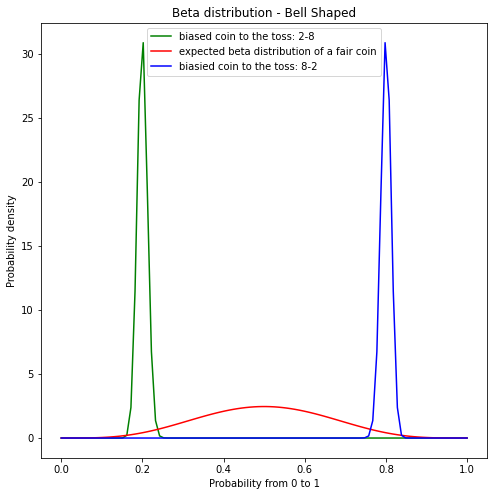

In [21]:
x = np.linspace(0,1,100)
y1 = beta.pdf(x, 200,800)
y2 = beta.pdf(x, 5,5)
y3 = beta.pdf(x, 800,200)
plt.figure(figsize=(8,8))
plt.title('Beta distribution - Bell Shaped')
plt.xlabel('Probability from 0 to 1')
plt.ylabel('Probability density')
plt.plot(x, y1, color = 'green', label = 'biased coin to the toss: 2-8')
plt.plot(x, y2, color = 'red', label = 'expected beta distribution of a fair coin')
plt.plot(x, y3, color = 'blue', label = 'biasied coin to the toss: 8-2')
plt.legend();

With a very small number of trials, Beta distribution can be a straight line, which is logical.

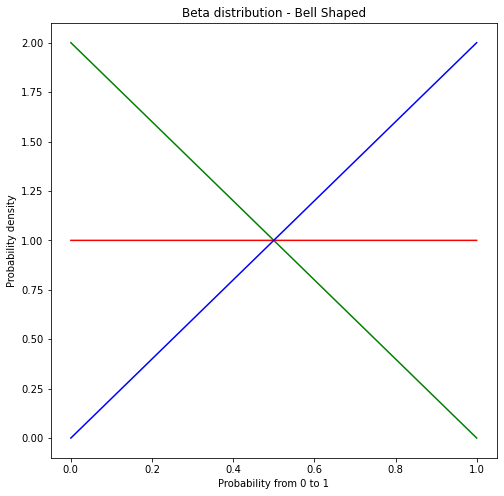

In [22]:
x = np.linspace(0,1,10000)
y1 = beta.pdf(x, 1,2)
y2 = beta.pdf(x, 1,1)
y3 = beta.pdf(x, 2,1)
plt.figure(figsize=(8,8))
plt.title('Beta distribution - Bell Shaped')
plt.xlabel('Probability from 0 to 1')
plt.ylabel('Probability density')
plt.plot(x, y1, color = 'green', label = 'biased coin to the toss: 1-2')
plt.plot(x, y2, color = 'red', label = 'expected beta distribution of a fair coin')
plt.plot(x, y3, color = 'blue', label = 'biasied coin to the toss: 2-1');
# plt.legend();

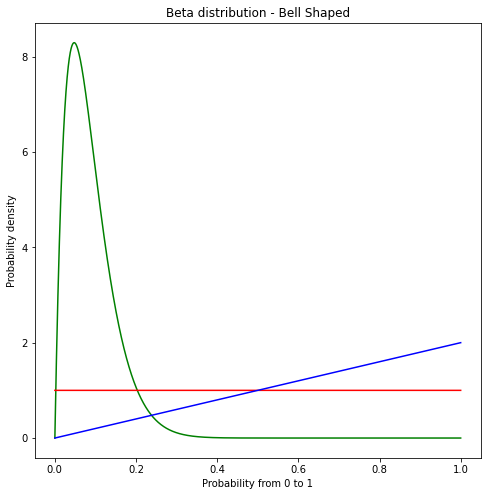

In [23]:
x = np.linspace(0,1,10000)
y1 = beta.pdf(x, 2,21)
y2 = beta.pdf(x, 1,1)
y3 = beta.pdf(x, 2,1)
plt.figure(figsize=(8,8))
plt.title('Beta distribution - Bell Shaped')
plt.xlabel('Probability from 0 to 1')
plt.ylabel('Probability density')
plt.plot(x, y1, color = 'green', label = 'biased coin to the toss: 1-2')
plt.plot(x, y2, color = 'red', label = 'expected beta distribution of a fair coin')
plt.plot(x, y3, color = 'blue', label = 'biasied coin to the toss: 2-1');
# plt.legend();